In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
# import matplotlib.mlab as mlab

import scipy.stats as sp

from datetime import datetime, timedelta, date

In [2]:
df_confirmed = pd.read_csv('./Data/Csv/COVID19_Confirmed.csv')
df_deaths = pd.read_csv('./Data/Csv/COVID19_Deaths.csv')
df_evolution = pd.read_csv('./Data/Csv/COVID19_Evolution_Confirmed.csv')
df_deaths_info = pd.read_csv('./Data/Csv/COVID19_Deaths_Information.csv')

In [3]:
df_confirmed['total_cases'] = df_confirmed.sum(axis=1)
df_deaths['total_deaths'] = df_deaths.sum(axis=1)

### Cleaning data

In [4]:
df_confirmed.rename(columns={'Unnamed: 0':'Provincia'}, inplace=True)
df_confirmed.set_index('Provincia',inplace = True)

df_deaths.rename(columns={'Unnamed: 0':'Provincia'}, inplace=True)
df_deaths.set_index('Provincia',inplace = True)

# df_deaths_info.rename(columns={'Unnamed: 0':'Fecha', 'sexo':'Sexo', 'edad':'Edad', 'provincia':'Provincia'}, inplace=True)
# df_deaths_info.set_index('Fecha',inplace = True)


# Updated

In [7]:
# print('Last information update: {}'.format((date.today()-timedelta(days=2)).strftime("%d/%m/%Y")))
print('Last information update: 24/04/2020')

Last information update: 24/04/2020


# Infected people

In [8]:
print('Infected people: {}'.format(df_confirmed['total_cases'].sum()))

Infected people: 3435


# Deaths

In [9]:
print('Deaths: {}'.format(df_deaths['total_deaths'].sum()))

Deaths: 165


# Infected people by province/region

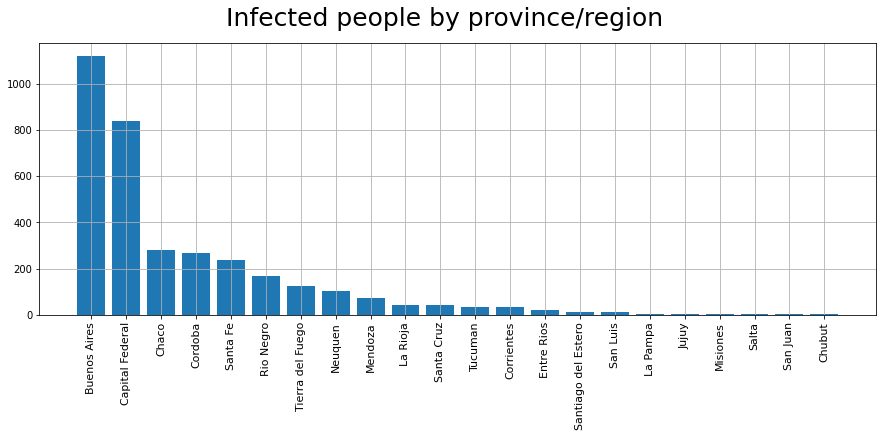

Infected people by province/region


Provincia
Buenos Aires           1120
Capital Federal         837
Chaco                   280
Cordoba                 266
Santa Fe                236
Rio Negro               169
Tierra del Fuego        125
Neuquen                 104
Mendoza                  75
La Rioja                 45
Santa Cruz               41
Tucuman                  35
Corrientes               35
Entre Rios               22
Santiago del Estero      12
San Luis                 11
La Pampa                  5
Jujuy                     5
Misiones                  5
Salta                     3
San Juan                  2
Chubut                    2
Name: total_cases, dtype: int64

In [16]:
has_cases = df_confirmed['total_cases'] > 0
provinces_with_cases = df_confirmed[has_cases].sort_values(by=['total_cases'], ascending=False)


plt.figure(figsize=(15,5))
plt.bar(provinces_with_cases.index,provinces_with_cases['total_cases'])
plt.xticks(provinces_with_cases.index, rotation='vertical', size=11)
plt.suptitle('Infected people by province/region', fontsize=25)

plt.grid()
plt.show()

print('Infected people by province/region')
provinces_with_cases['total_cases']

# Deaths at the provinces/regions with infected people

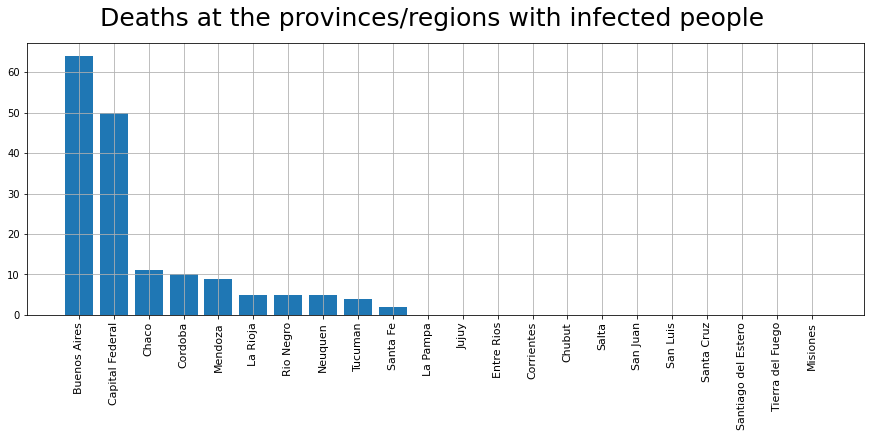

Deaths at the provinces/regions with infected people


Provincia
Buenos Aires           64
Capital Federal        50
Chaco                  11
Cordoba                10
Mendoza                 9
La Rioja                5
Rio Negro               5
Neuquen                 5
Tucuman                 4
Santa Fe                2
La Pampa                0
Jujuy                   0
Entre Rios              0
Corrientes              0
Chubut                  0
Salta                   0
San Juan                0
San Luis                0
Santa Cruz              0
Santiago del Estero     0
Tierra del Fuego        0
Misiones                0
Name: total_deaths, dtype: int64

In [18]:
deaths_of_infected_provinces = df_deaths[has_cases].sort_values(by=['total_deaths'], ascending=False)

plt.figure(figsize=(15,5))
plt.bar(deaths_of_infected_provinces.index,deaths_of_infected_provinces['total_deaths'])
plt.xticks(deaths_of_infected_provinces.index, rotation='vertical', size=11)
plt.suptitle('Deaths at the provinces/regions with infected people', fontsize=25)
plt.grid()
plt.show()

print('Deaths at the provinces/regions with infected people')
deaths_of_infected_provinces['total_deaths']

# Deaths/age  histogram

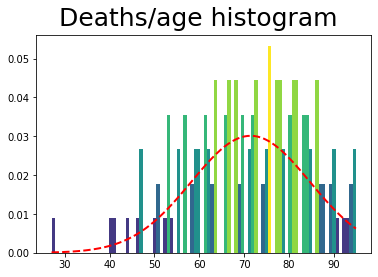

In [20]:
x = df_deaths_info[df_deaths_info['Edad'].notna()]['Edad']

n, bins, patches = plt.hist(x,bins=90,density=True)

(mu, sigma) = sp.norm.fit(x)
y = sp.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

fracs = n/n.max()
normcolors = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs,patches):
    color = plt.cm.viridis(normcolors(thisfrac))
    thispatch.set_facecolor(color)
    
plt.suptitle('Deaths/age histogram', fontsize=25)
plt.show()


# Deaths by ages

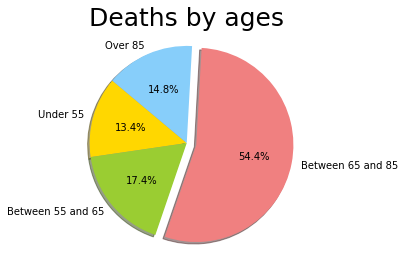

In [21]:
# Prepare data
def deaths_info_age_filt(inf_limit, sup_limit):
    return ((df_deaths_info['Edad'] >= inf_limit) & (df_deaths_info['Edad'] <= sup_limit))

total = df_deaths_info['Edad'].count()
under55 = df_deaths_info[deaths_info_age_filt(0,55)]['Edad'].count() / total 
bet55n65 = df_deaths_info[deaths_info_age_filt(56,65)]['Edad'].count() / total
bet65n85 = df_deaths_info[deaths_info_age_filt(65,85)]['Edad'].count() / total
over85 = df_deaths_info[deaths_info_age_filt(86,200)]['Edad'].count() / total

# Data to plot
labels = ['Under 55', 'Between 55 and 65', 'Between 65 and 85', 'Over 85']
sizes = [under55,bet55n65,bet65n85,over85]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1, 0)
plt.suptitle('Deaths by ages', fontsize=25)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)


plt.axis('equal')
plt.show()

# Provinces with infected people and no deaths

In [22]:

has_no_deaths = deaths_of_infected_provinces['total_deaths'] == 0
provinces_without_deaths = deaths_of_infected_provinces[has_no_deaths].index.values

print('Provinces with infected people and no deaths')
df_confirmed.T[provinces_without_deaths].T.sort_values(by=['total_cases'], ascending=False)['total_cases']



Provinces with infected people and no deaths


Provincia
Tierra del Fuego       125
Santa Cruz              41
Corrientes              35
Entre Rios              22
Santiago del Estero     12
San Luis                11
La Pampa                 5
Jujuy                    5
Misiones                 5
Salta                    3
Chubut                   2
San Juan                 2
Name: total_cases, dtype: int64

# Mortality of provinces/regions with infected people

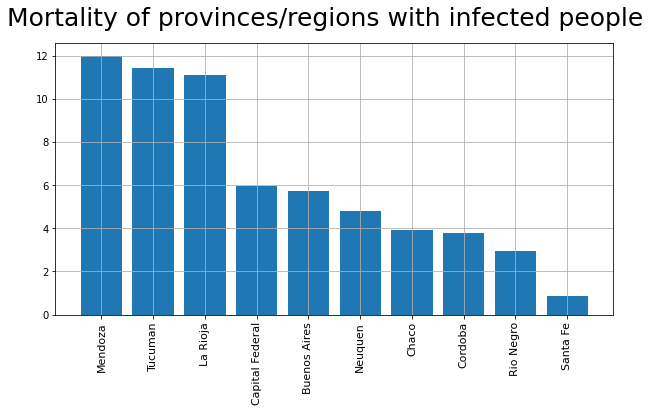

Mortality of provinces/regions with infected people


,conf total_cases,death total_deaths,% death
Provincia,,,
Mendoza,75,9,12.000000
Tucuman,35,4,11.428571
La Rioja,45,5,11.111111
Capital Federal,837,50,5.973716
Buenos Aires,1120,64,5.714286
Neuquen,104,5,4.807692
Chaco,280,11,3.928571
Cordoba,266,10,3.759398
Rio Negro,169,5,2.958580


In [24]:
tmp_confirmed = provinces_with_cases.copy()
tmp_deaths = deaths_of_infected_provinces.copy()
tmp_confirmed.columns =  ['conf ' + col_name for col_name in tmp_confirmed.columns]
tmp_deaths.columns =  ['death ' + col_name for col_name in tmp_deaths.columns]
df_confirmed_and_deaths = pd.concat([tmp_confirmed, tmp_deaths], axis=1, join='inner')

df_confirmed_and_deaths['% death'] = (df_confirmed_and_deaths['death total_deaths'] / df_confirmed_and_deaths['conf total_cases']) * 100 
df_confirmed_and_deaths.sort_values(by=['% death'], ascending=False, inplace = True)

has_deaths_percentage = df_confirmed_and_deaths['% death'] > 0
provinces_with_deaths_percentage = df_confirmed_and_deaths[has_deaths_percentage] 

plt.figure(figsize=(10,5))
plt.bar(provinces_with_deaths_percentage.index,provinces_with_deaths_percentage['% death'])
plt.xticks(provinces_with_deaths_percentage.index, rotation='vertical', size=11)
plt.suptitle('Mortality of provinces/regions with infected people', fontsize=25)
plt.grid()
plt.show()

print('Mortality of provinces/regions with infected people')
provinces_with_deaths_percentage[['conf total_cases', 'death total_deaths','% death']]

# Daily contagion and death curve

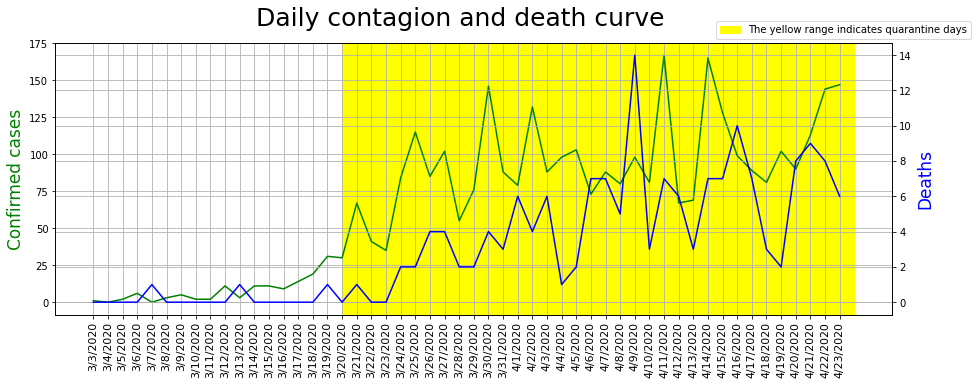

In [34]:
df_confirmed_transposed = df_confirmed.drop('total_cases',axis=1).transpose()
df_deaths_transposed = df_deaths.drop('total_deaths',axis=1).transpose()
df_deaths_transposed['total_deaths'] = df_deaths_transposed.sum(axis = 1)
df_confirmed_transposed['total_cases'] = df_confirmed_transposed.sum(axis = 1)
today = date.today()


plt.figure(figsize=(15,5))

plt.plot(df_confirmed_transposed.index, df_confirmed_transposed['total_cases'], color='g')
plt.ylabel('Confirmed cases', color='g',size=17)
plt.axvspan('3/20/2020',today.strftime("%m/%d/%Y"),color='yellow',fill=True)
plt.grid()

plt.xticks(rotation='vertical',size=11)
ax2 = plt.gca().twinx()

plt.plot(df_deaths_transposed.index, df_deaths_transposed['total_deaths'], color='b')
plt.ylabel('Deaths', color='b',size=17)
plt.suptitle('Daily contagion and death curve', fontsize=25)
plt.grid()

quarantine = mpatches.Patch(color='yellow',label='The yellow range indicates quarantine days')
plt.legend(handles=[quarantine],bbox_to_anchor = (1.1,1.1))

plt.show()

# Evolutive contagion and death curve

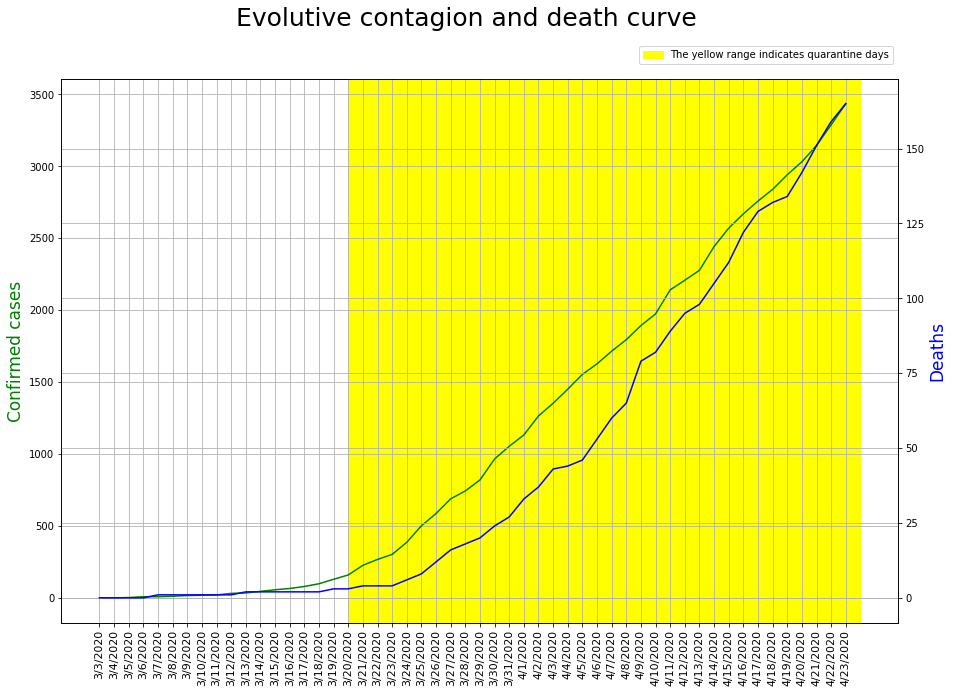

In [35]:
today = date.today()
df_confirmed_transposed['evolutive_cases'] = df_confirmed_transposed['total_cases'].cumsum()
df_deaths_transposed['evolutive_deaths'] = df_deaths_transposed['total_deaths'].cumsum()



plt.figure(figsize=(15,10))

plt.plot(df_confirmed_transposed.index, df_confirmed_transposed['evolutive_cases'], color='g')
plt.ylabel('Confirmed cases', color='g',size=17)
plt.axvspan('3/20/2020',today.strftime("%m/%d/%Y"),color='yellow',fill=True)
plt.grid()

plt.xticks(rotation='vertical',size=11)
ax2 = plt.gca().twinx()

plt.plot(df_deaths_transposed.index, df_deaths_transposed['evolutive_deaths'], color='b')
plt.ylabel('Deaths', color='b',size=17)
plt.suptitle('Evolutive contagion and death curve', fontsize=25)
plt.grid()

quarantine = mpatches.Patch(color='yellow',label='The yellow range indicates quarantine days')
plt.legend(handles=[quarantine],bbox_to_anchor = (1.,1.07))

plt.show()

# Provinces

##  Reported contagions by day

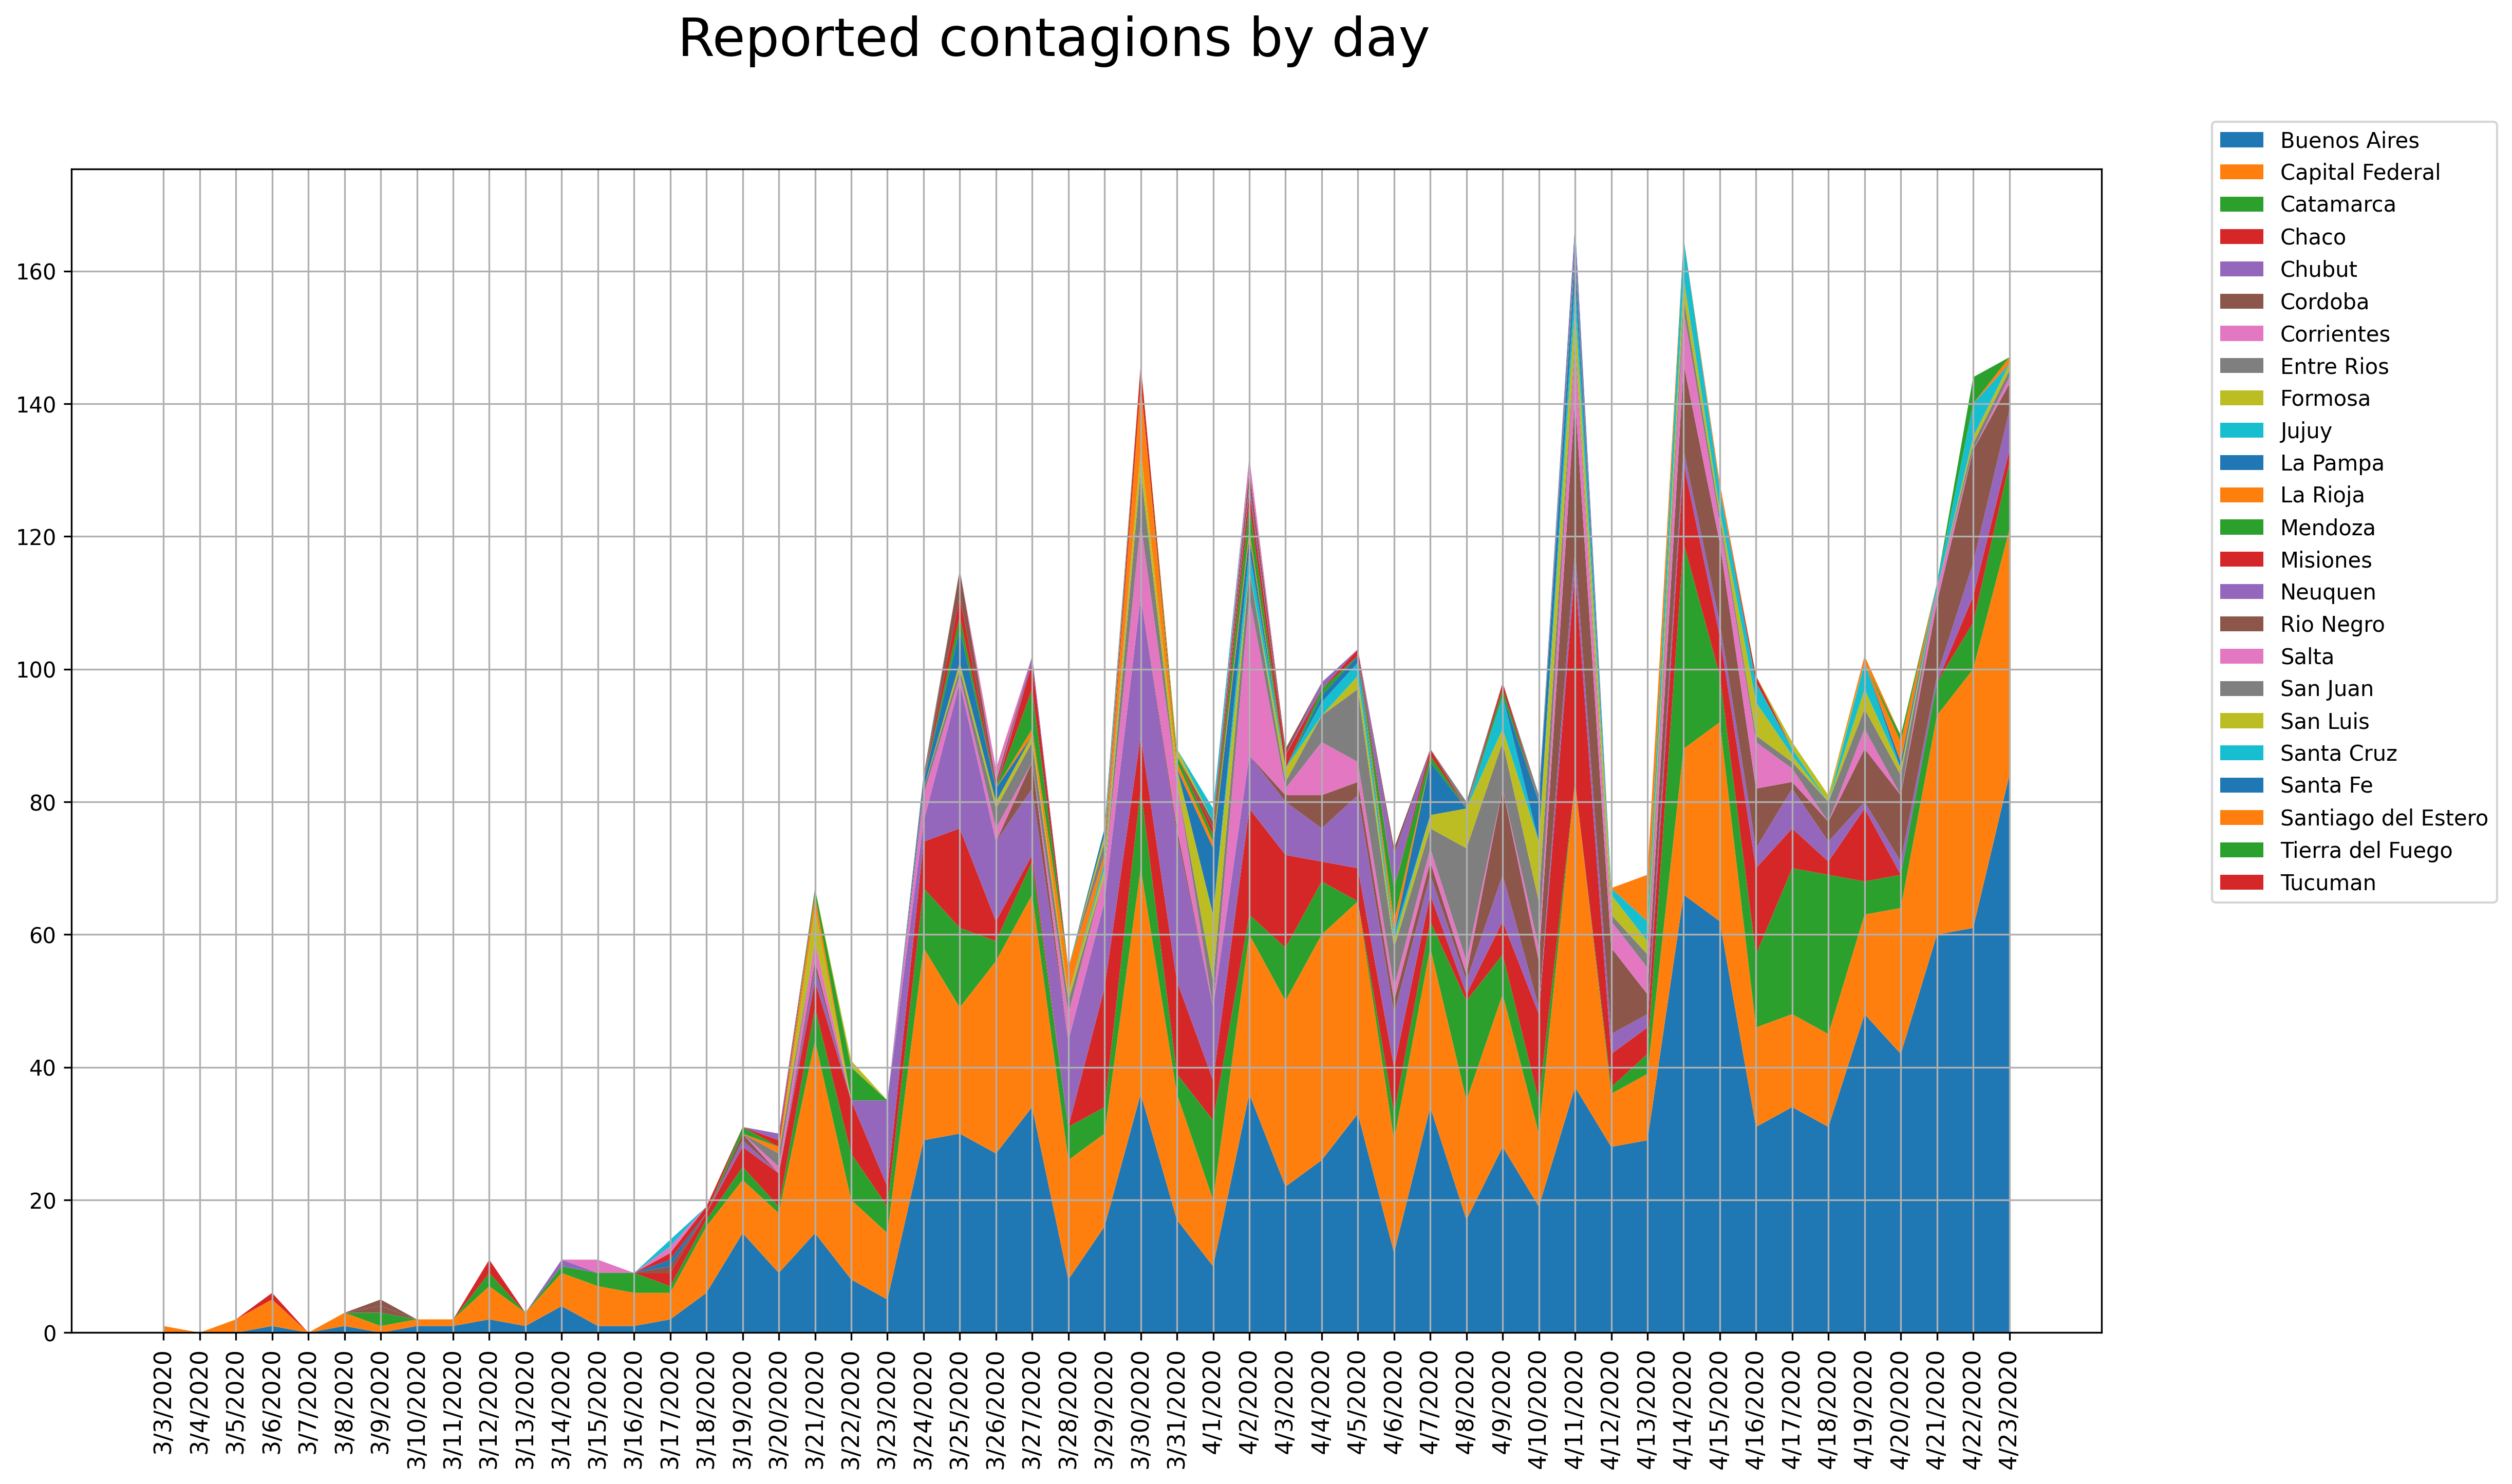

In [37]:
y = df_confirmed.sort_values(by=['total_cases'], ascending=False).drop(columns=['total_cases']).values
x = df_confirmed_transposed.drop(columns=['total_cases','evolutive_cases']).index.values


labels = df_confirmed.index.values

plt.figure(figsize=(17,10),dpi=300)
plt.stackplot(x,y, labels=labels)
plt.legend(bbox_to_anchor = (1.2,1.05))
plt.xticks(rotation='vertical', size=11)
plt.suptitle('Reported contagions by day', fontsize=25)
plt.grid()
plt.show()

## Reported deaths by day

/home/facundo/Proyects/covid/Covid-19-Argentina/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


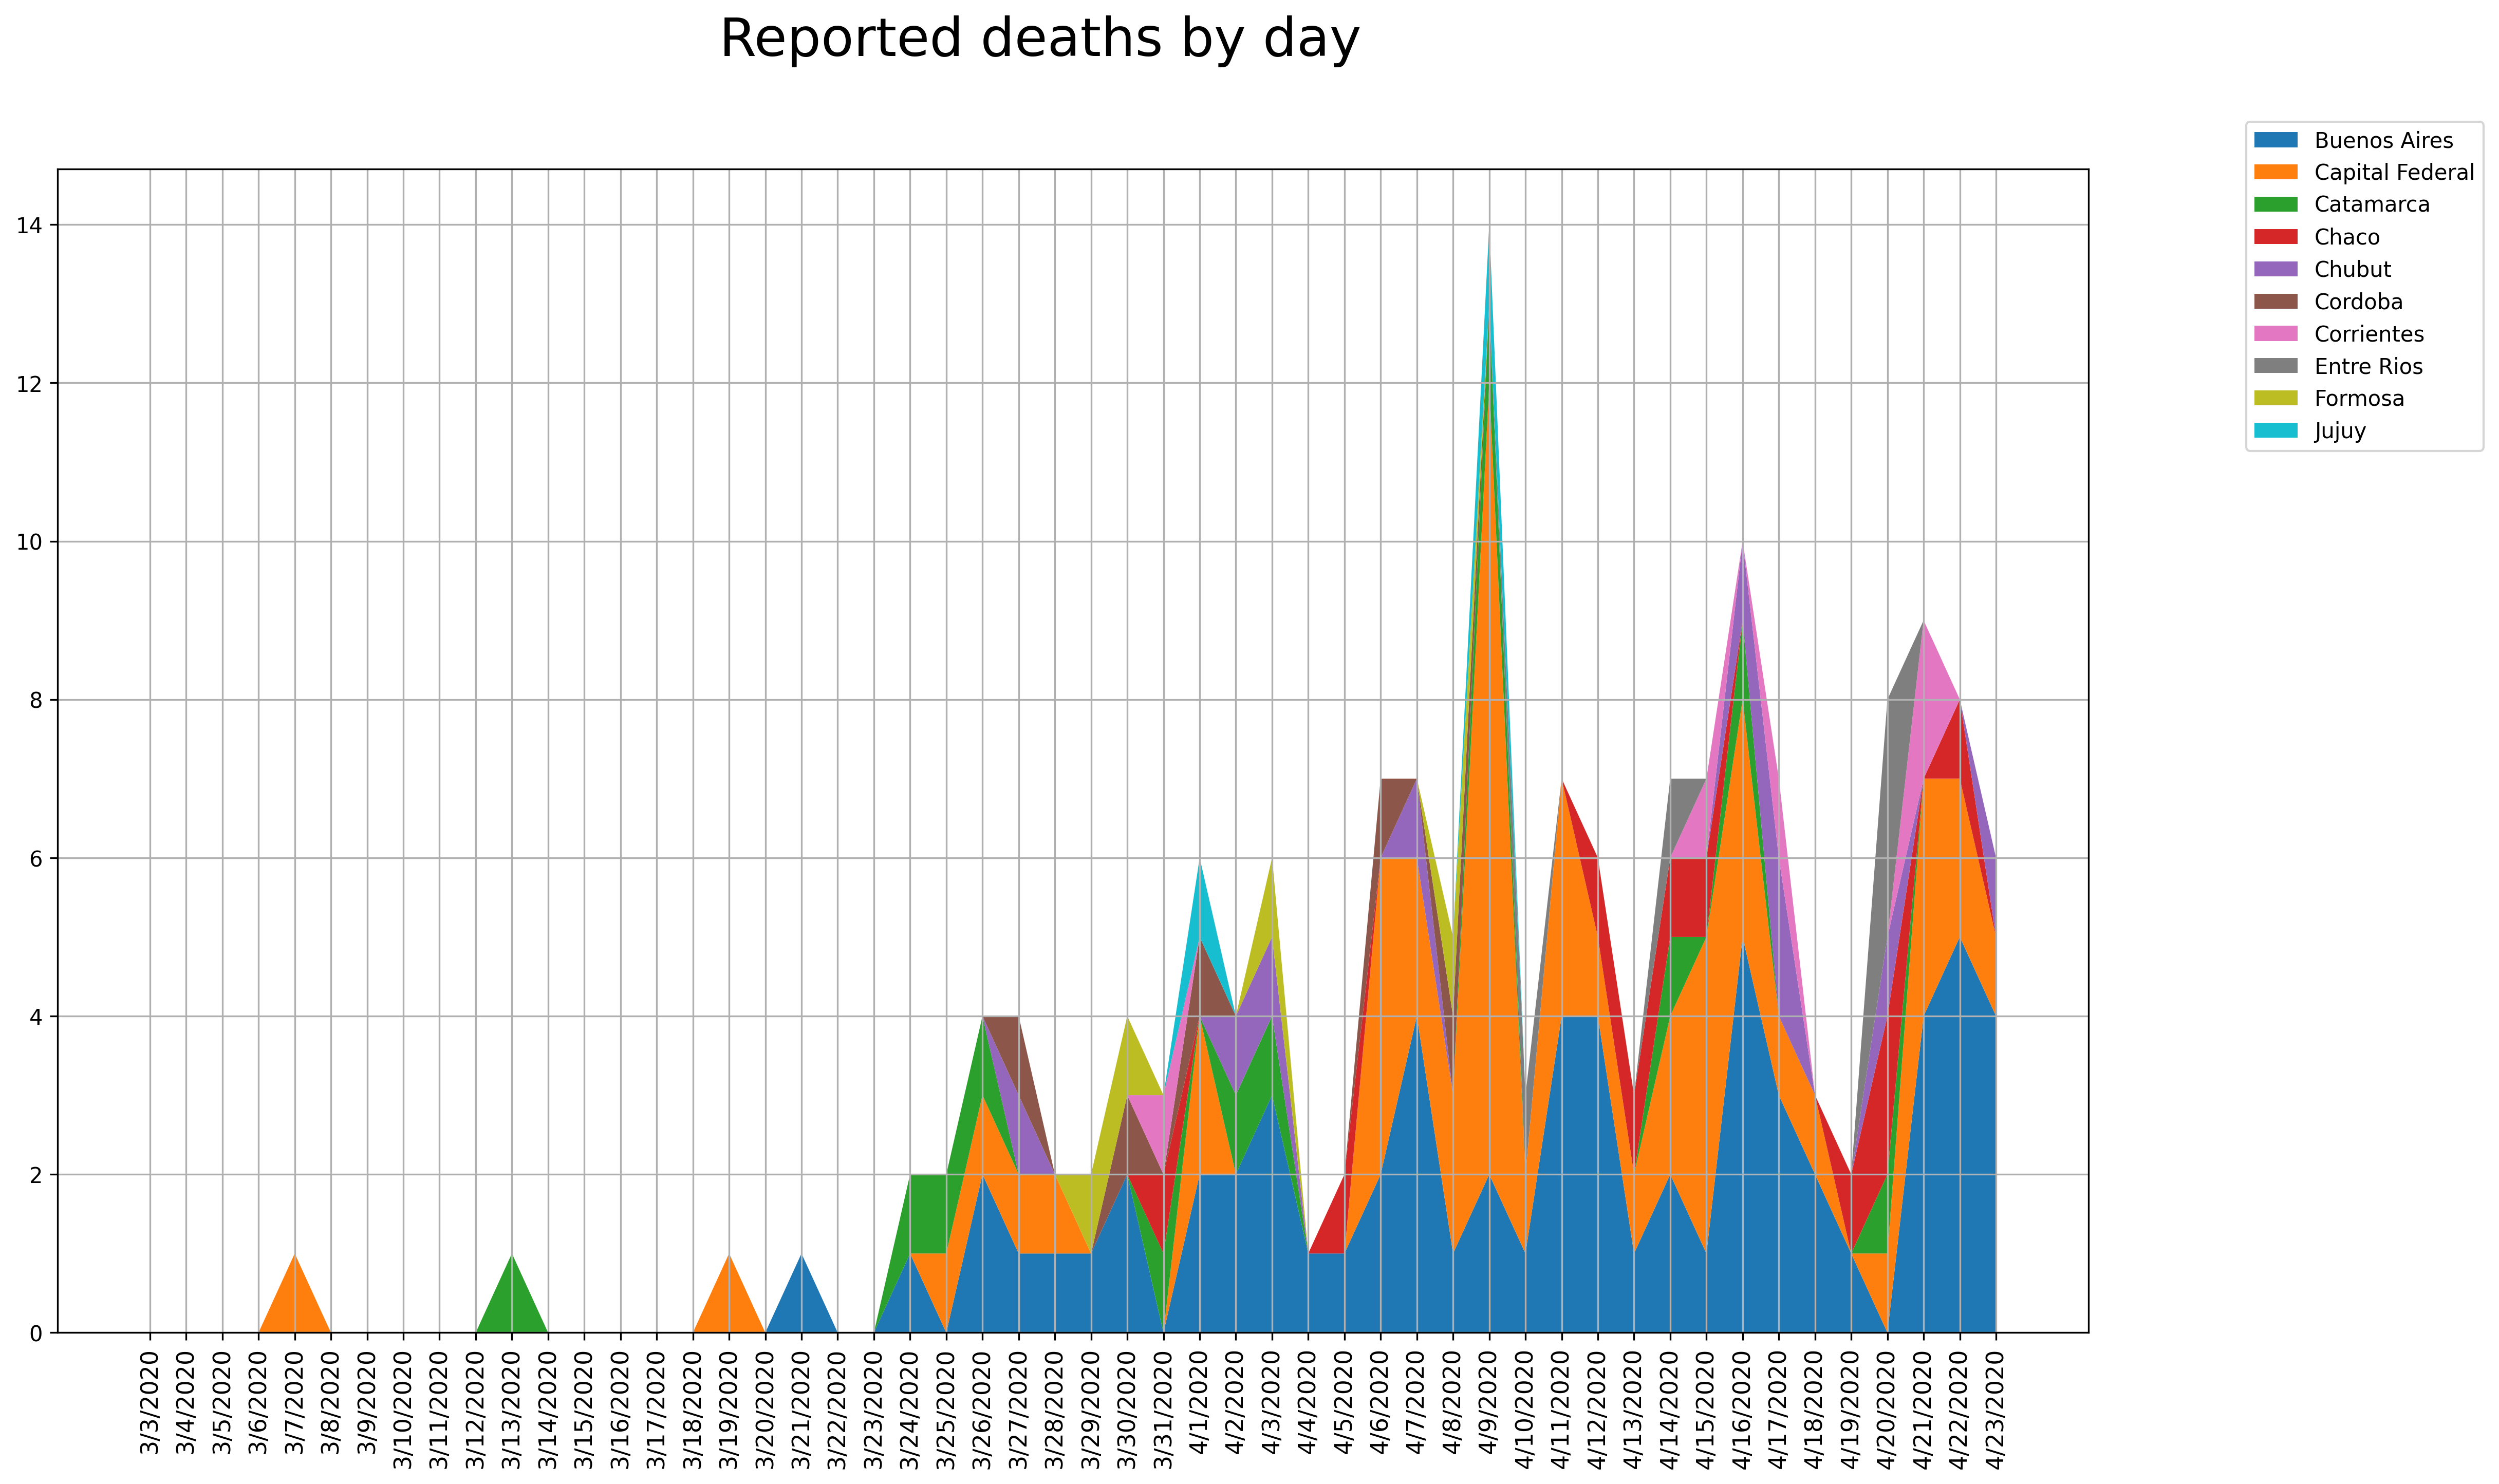

In [38]:
has_deaths = df_deaths['total_deaths'] > 0 
y = df_deaths.sort_values(by=['total_deaths'], ascending=False).drop(columns=['total_deaths'])[has_deaths].values
x = df_deaths_transposed.drop(columns=['total_deaths','evolutive_deaths']).index.values

labels = df_deaths.index.values
plt.figure(figsize=(17,10),dpi=300)
plt.stackplot(x,y, labels=labels)
plt.legend(bbox_to_anchor = (1.2,1.05))
plt.xticks(rotation='vertical', size=11)
plt.suptitle('Reported deaths by day', fontsize=25)
plt.grid()
plt.show()

## Evolutive contagion curve

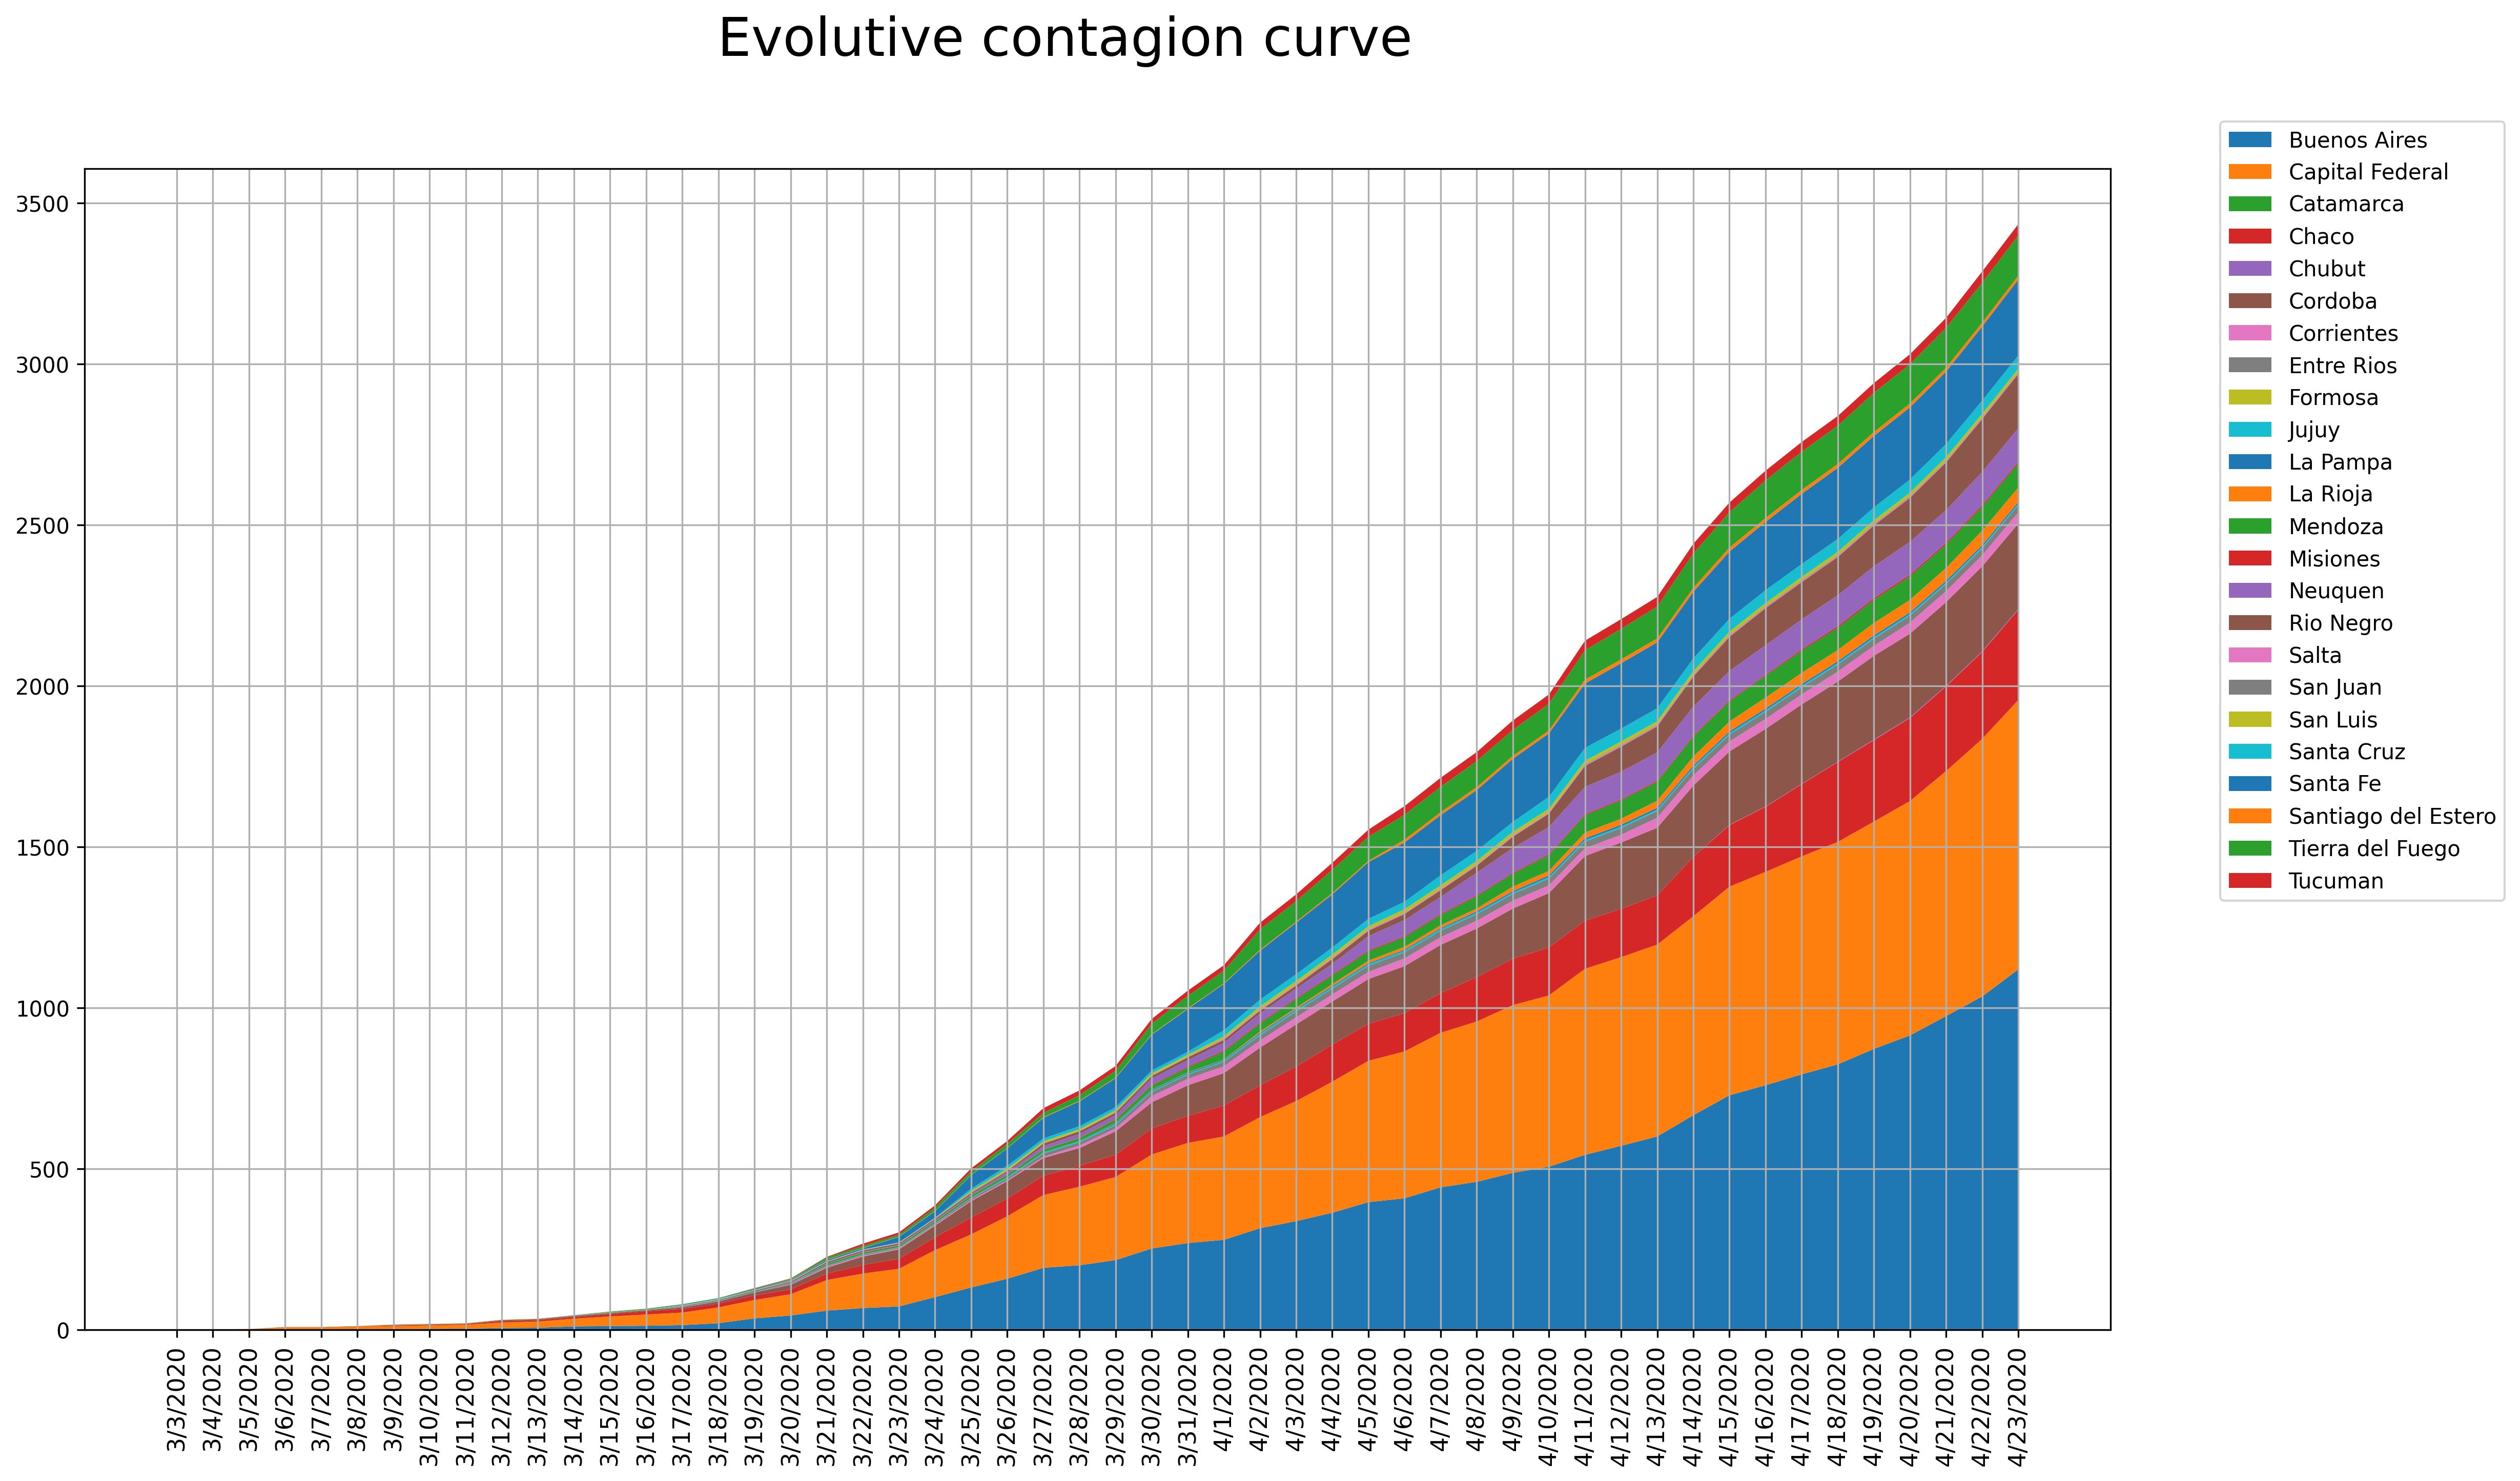

In [39]:
x = df_confirmed_transposed['evolutive_cases'].index.values
y = df_confirmed_transposed.cumsum(axis=0).drop(columns=['evolutive_cases','total_cases']).T
                                           
labels = df_confirmed.index.values
plt.figure(figsize=(17,10),dpi=300)
plt.stackplot(x,y, labels=labels)
plt.legend(bbox_to_anchor = (1.2,1.05))
plt.xticks(rotation='vertical', size=11)
plt.suptitle('Evolutive contagion curve', fontsize=25)
plt.grid()
plt.show()

## Evolutive death curve

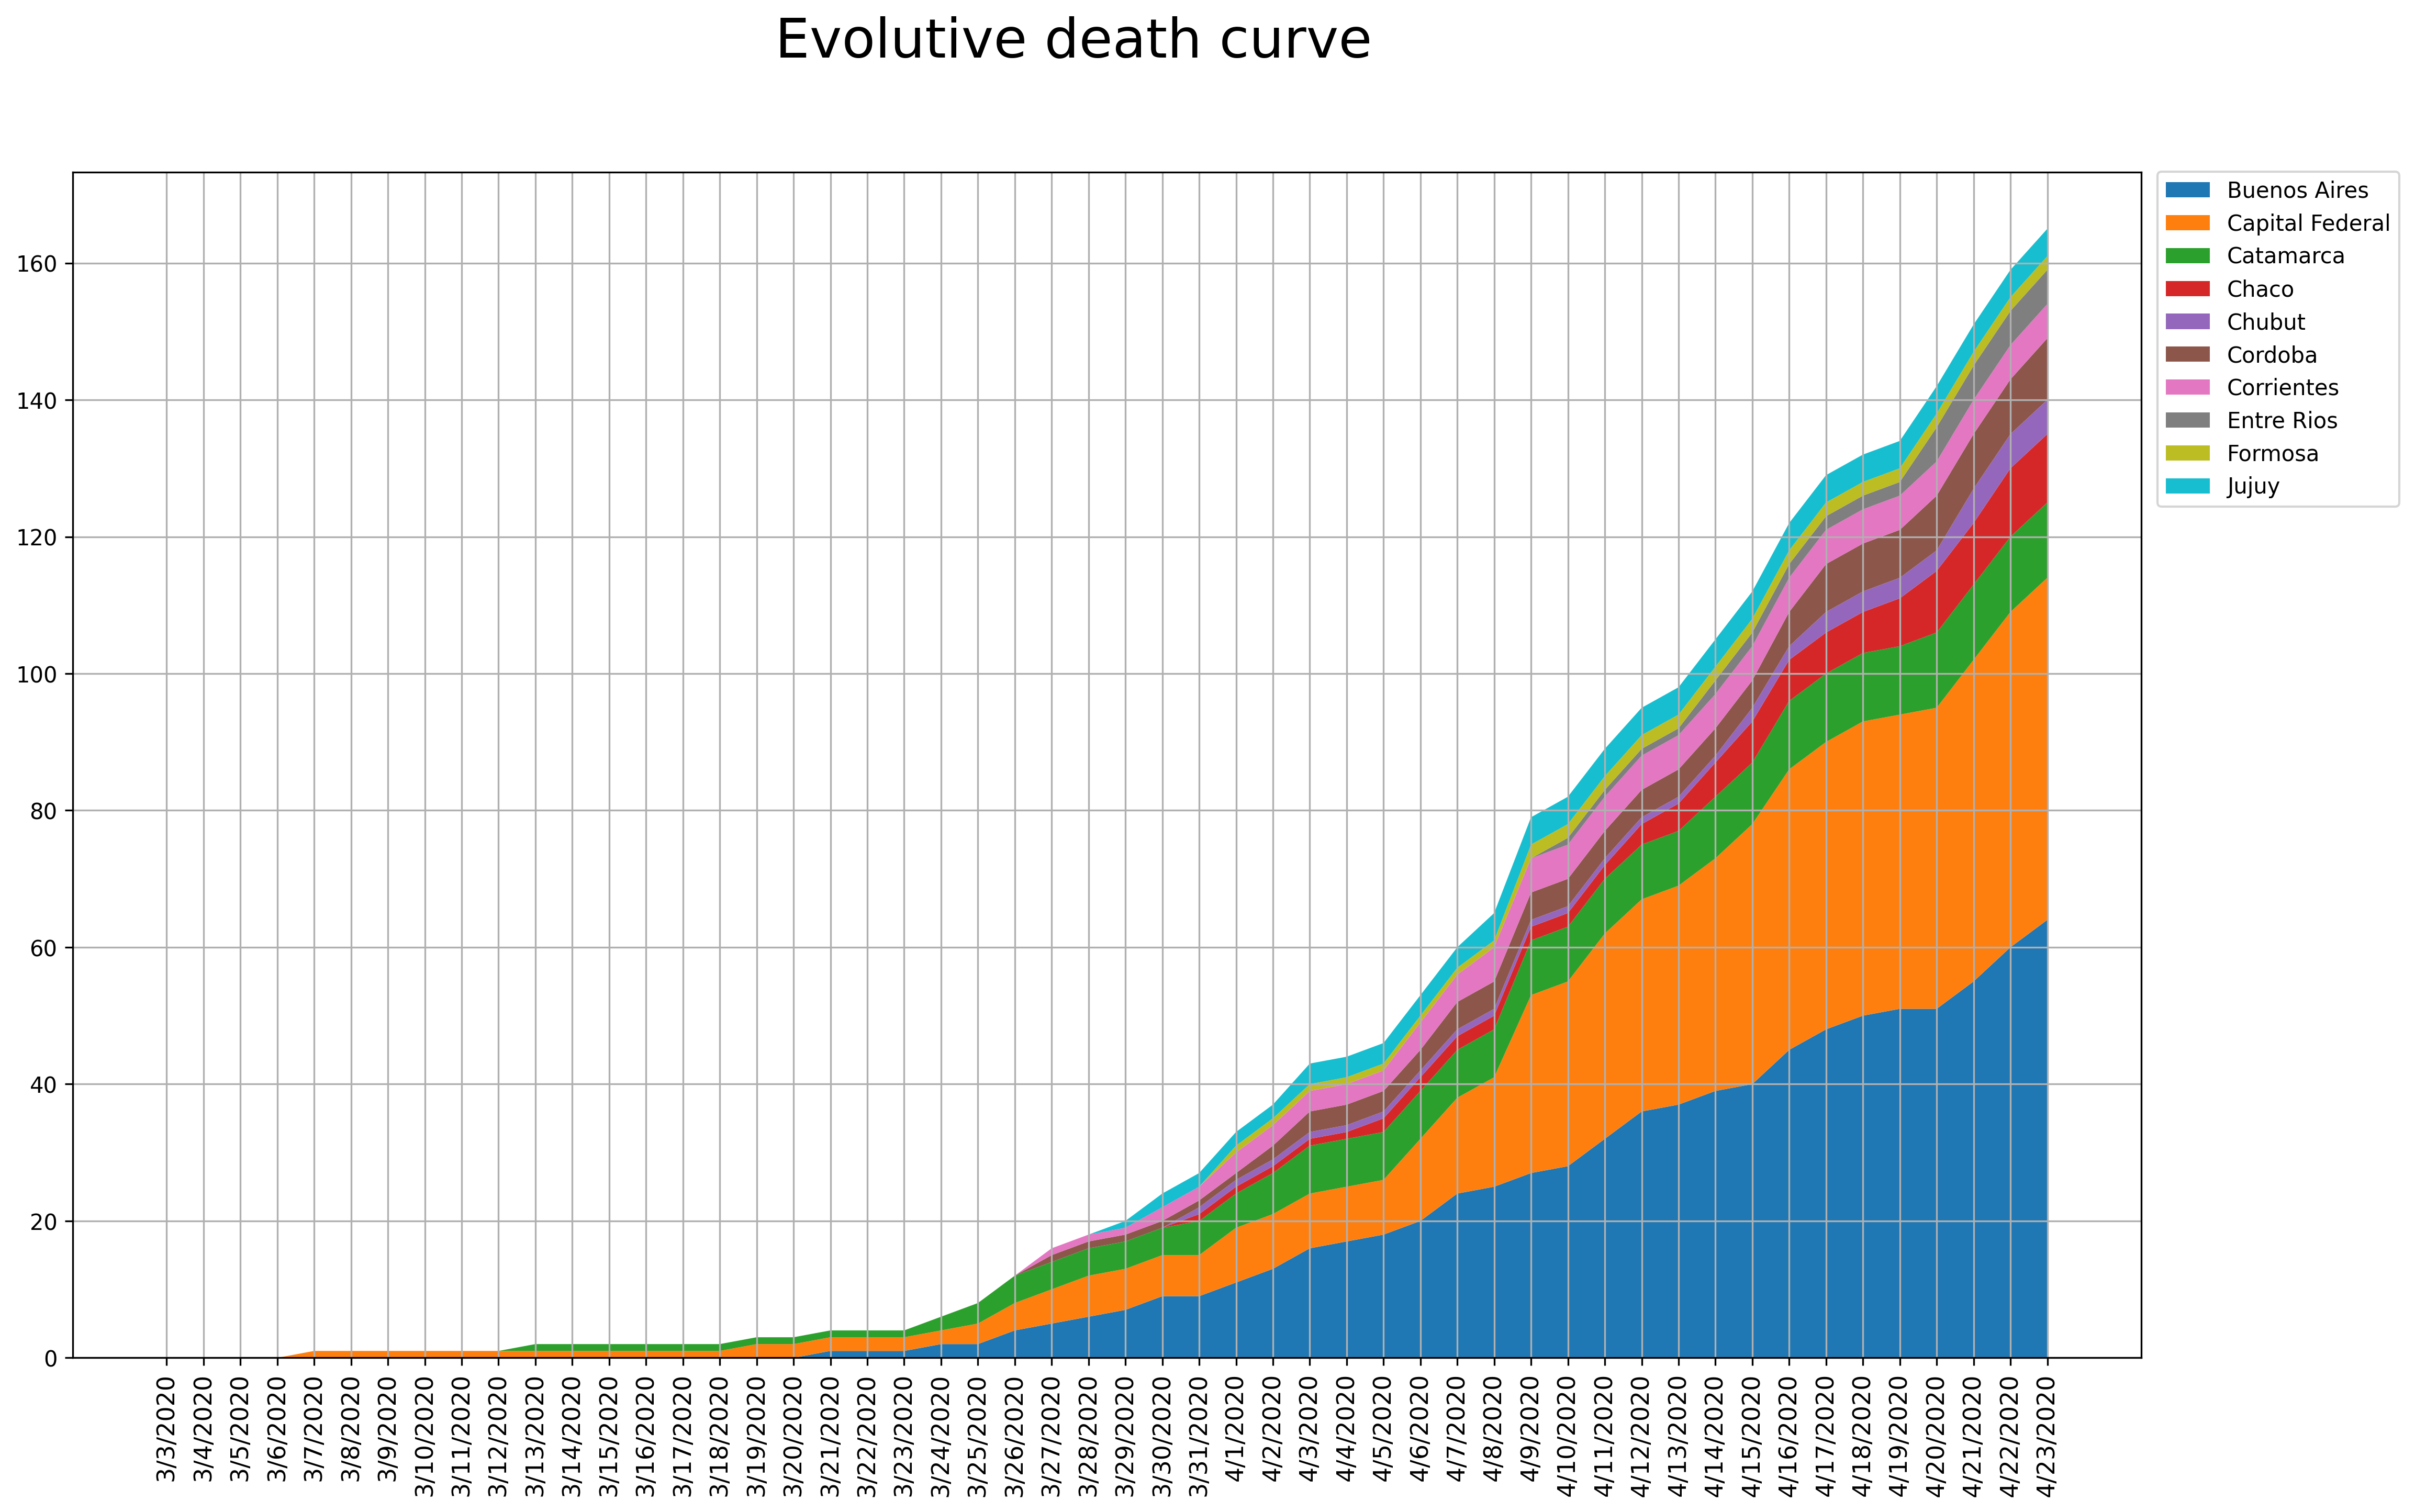

In [49]:
has_deaths = df_deaths['total_deaths'] > 0
x = df_deaths_transposed['evolutive_deaths'].index.values
y = df_deaths[has_deaths].drop(columns=['total_deaths']).T.cumsum(axis=0).T                                      

labels = df_deaths.index.values
plt.figure(figsize=(17,10),dpi=300)
plt.stackplot(x,y, labels=labels)
plt.legend(bbox_to_anchor = (1.13,1.01))
plt.xticks(rotation='vertical', size=11)
plt.suptitle('Evolutive death curve', fontsize=25)
plt.grid()
plt.show()